<a href="https://colab.research.google.com/github/driisss/Intro-To-AI/blob/main/Kmeans_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

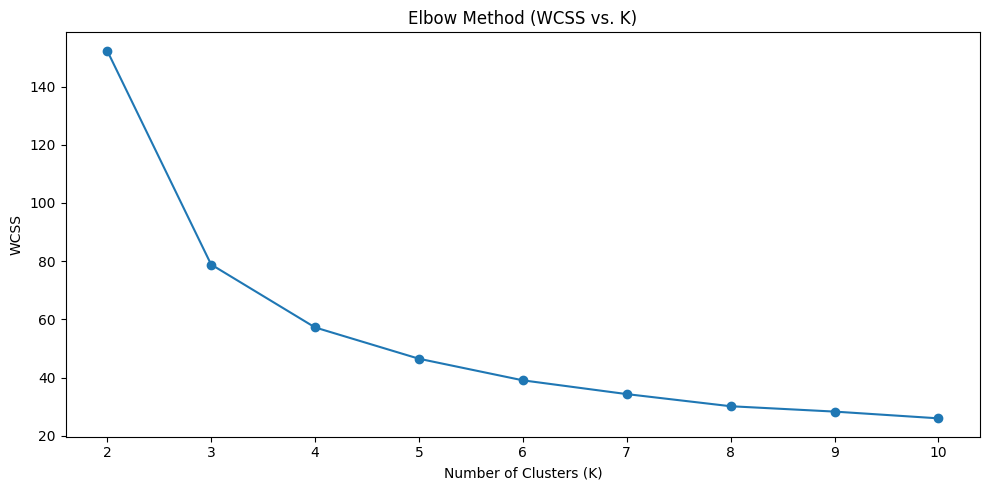

Silhouette Score for K=3: 0.5528190123564095


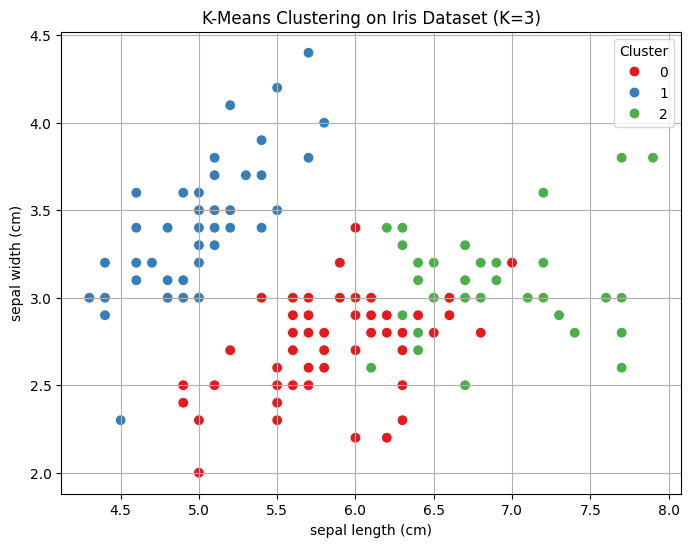

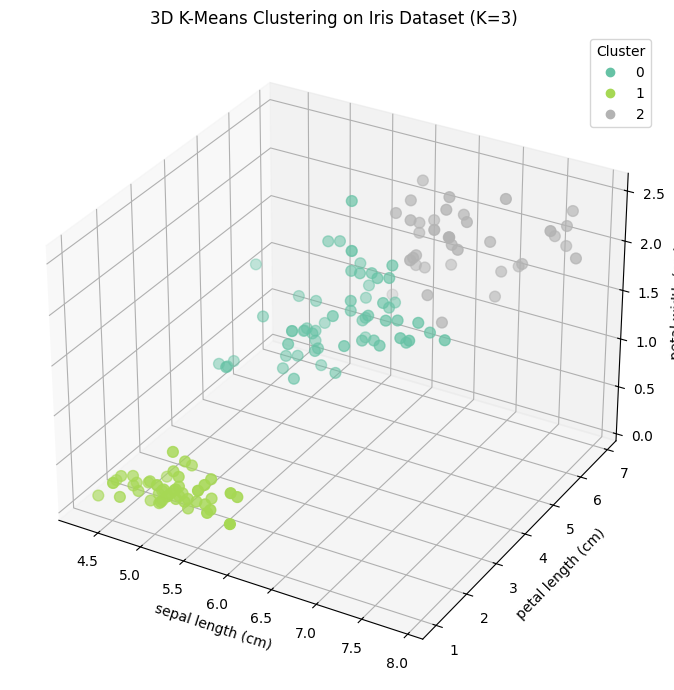

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Elbow Method (WCSS) and Silhouette Scores for K=2 to 10
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot WCSS vs. K
plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method (WCSS vs. K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

# Final KMeans with optimal K=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X)

# Optional: View silhouette score
final_silhouette = silhouette_score(X, clusters)
print("Silhouette Score for K=3:", final_silhouette)

# Add cluster labels to DataFrame for visualization
X['Cluster'] = clusters

# Scatter plot using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=clusters, palette="Set1", s=60)
plt.title("K-Means Clustering on Iris Dataset (K=3)")
plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Select 3 features for 3D plot
feat1 = 'sepal length (cm)'
feat2 = 'petal length (cm)'
feat3 = 'petal width (cm)'

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X[feat1], X[feat2], X[feat3],
    c=X['Cluster'], cmap='Set2', s=60
)

ax.set_title("3D K-Means Clustering on Iris Dataset (K=3)")
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel(feat3)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()